In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files, compute_network_avg_prediction

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

# Load splits

In [3]:
magdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.test.csv'))
p_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','p.20230101.csv'))
s_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.test.csv'))
s_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.20230101.csv'))
p_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.train.csv'))
s_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.train.csv'))


In [4]:
np.where(p_test_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [5]:
np.where(p_2023_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [6]:
np.where(s_test_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [7]:
np.where(s_2023_df.duplicated(['Evid', 'station']))

(array([], dtype=int64),)

In [8]:
p_test_evids = p_test_df['Evid'].unique()
p_2023_evids = p_2023_df['Evid'].unique()
s_test_evids = s_test_df['Evid'].unique()
s_2023_evids = s_2023_df['Evid'].unique()
p_train_evids = p_train_df['Evid'].unique()
s_train_evids = s_train_df['Evid'].unique()


# Load YP21 catalogs

In [ ]:
ypml_amps = pd.read_csv(f'../../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

In [10]:
ypml_amps["Sta"].unique().shape

(10,)

In [39]:
ypml_amps["Sta"].value_counts()

Sta
YMR     6709
YNR     6599
YFT     3789
YHB     3720
YUF     2281
LKWY    1751
BOZ      919
AHID     203
BW06     123
LOHW       4
Name: count, dtype: int64

# Load predictions and results

In [11]:
allfeatdir = "all_features_constHP"
selectedfeatdir = "selected_features_constHP"
summfilename = 'all.stat.results.csv'
p_resultsdir = os.path.join(magdir, 'p_models')
s_resultsdir = os.path.join(magdir, 's_models')

In [12]:
p_sub_results = pd.read_csv(os.path.join(p_resultsdir, selectedfeatdir, summfilename))
s_sub_results = pd.read_csv(os.path.join(s_resultsdir, selectedfeatdir, summfilename))

p_all_results = pd.read_csv(os.path.join(p_resultsdir, allfeatdir, summfilename))
s_all_results = pd.read_csv(os.path.join(s_resultsdir, allfeatdir, summfilename))

In [13]:
p_stats = p_test_df.station.unique()
p_sub_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'test')

p_sub_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [14]:
p_all_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'test')

p_all_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [15]:
s_stats = s_test_df.station.unique()
s_sub_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'test')

s_sub_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


In [16]:
s_all_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'test')

s_all_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


In [17]:
p_sub_train_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'train')
s_sub_train_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'train')

In [18]:
p_all_test_avg = compute_network_avg_prediction(p_all_test_preds)
p_all_2023_avg = compute_network_avg_prediction(p_all_2023_preds)

p_sub_test_avg = compute_network_avg_prediction(p_sub_test_preds)
p_sub_2023_avg = compute_network_avg_prediction(p_sub_2023_preds)

In [19]:
s_all_test_avg = compute_network_avg_prediction(s_all_test_preds)
s_all_2023_avg = compute_network_avg_prediction(s_all_2023_preds)

s_sub_test_avg = compute_network_avg_prediction(s_sub_test_preds)
s_sub_2023_avg = compute_network_avg_prediction(s_sub_2023_preds)

In [20]:
def get_r2(df):
    return r2_score(df['magnitude'],
                    df['predicted_magnitude'])

In [21]:
p_all_test_avg_r2 = get_r2(p_all_test_avg)
p_all_2023_avg_r2 = get_r2(p_all_2023_avg)

p_sub_test_avg_r2 = get_r2(p_sub_test_avg)
p_sub_2023_avg_r2 = get_r2(p_sub_2023_avg)

In [22]:
s_all_test_avg_r2 = get_r2(s_all_test_avg)
s_all_2023_avg_r2 = get_r2(s_all_2023_avg)

s_sub_test_avg_r2 = get_r2(s_sub_test_avg)
s_sub_2023_avg_r2 = get_r2(s_sub_2023_avg)

# $R^2$ summary plots

In [23]:
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

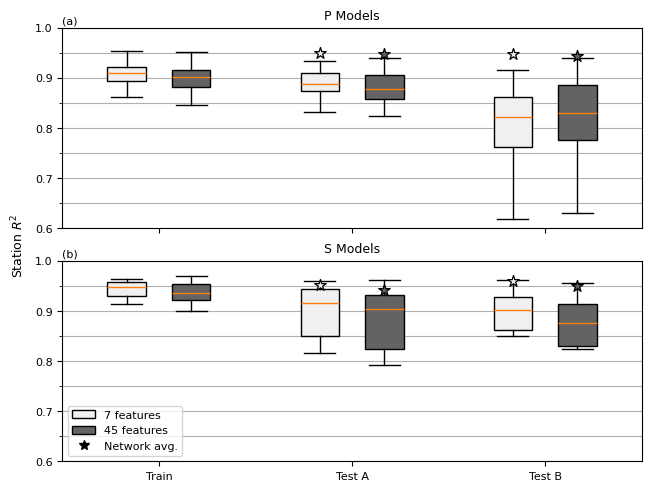

In [24]:
fig, axes = plt.subplots(2, 1, constrained_layout=True)

h_offset = 0.25
r2_marker = '*'
r2_markersize = 75
r2_marker_linewidth = 0.9
bp_colors = ['#f0f0f0', '#636363']
cap_width = 0.12
main_x = np.array([0, 0.75, 1.5])
splits = ['Train', 'Test A', 'Test B']
ylim = [0.6, 1.0]
labels = ['7 features', '45 features', 'Network avg.']

test_r2 = [p_sub_test_avg_r2, p_all_test_avg_r2]
holdout_r2 = [p_sub_2023_avg_r2, p_all_2023_avg_r2]
ax = axes[0]
for i, df in enumerate([p_sub_results, p_all_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[1:2]+offset, test_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[-1:]+offset, holdout_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

ax.set_xticks(main_x+(h_offset/2), [])
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("P Models")
ax.set_xlim([-0.25, 2])


ax = axes[1]
test_r2 = [s_sub_test_avg_r2, s_all_test_avg_r2]
holdout_r2 = [s_sub_2023_avg_r2, s_all_2023_avg_r2]
legend_boxes = []
for i, df in enumerate([s_sub_results, s_all_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    ax.scatter(main_x[1:2]+offset, test_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize, 
               edgecolor='k',
               linewidth=r2_marker_linewidth,)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    star = ax.scatter(main_x[-1:]+offset, holdout_r2[i],
               marker=r2_marker,
               color=color,
               zorder=10,
               s=r2_markersize,
               edgecolor='k',
               linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

    legend_boxes.append(bp1['boxes'][0])

ax.set_xticks(main_x+(h_offset/2), splits)
ax.set_ylim(ylim)
ax.set_xlim([-0.25, 2])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("S Models")
fig.supylabel("Station $R^2$")


subpanel_labels = ["(a)", "(b)"]
for i, ax in enumerate(axes):
    ax.text(0, 1.02, subpanel_labels[i], 
    transform=ax.transAxes,)

# Set up legend
star = Line2D([0], [0], marker=r2_marker, 
              color='black', 
              markersize=r2_markersize//10, 
              linestyle='')
legend_boxes.append(star)
ax.legend(legend_boxes, labels, loc='lower left')


In [25]:
print("P test")
print(p_sub_test_avg_r2)
print(p_all_test_avg_r2)
print('P 2023')
print(p_sub_2023_avg_r2)
print(p_all_2023_avg_r2)
print("S Test")
print(s_sub_test_avg_r2)
print(s_all_test_avg_r2)
print('S 2023')
print(s_sub_2023_avg_r2)
print(s_all_2023_avg_r2)

P test
0.94899629484207
0.9471979247557927
P 2023
0.9466558772009794
0.9433888998965212
S Test
0.9518536729154369
0.9423483755502344
S 2023
0.959452684910144
0.9498863821108356


In [26]:
print(p_all_results[p_all_results['holdout_r2'] > 0]['holdout_r2'].min())
p_all_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.599


,train_r2,test_r2,holdout_r2
min,0.794,0.758,-3.616
max,0.951,0.939,0.940
50%,0.901,0.878,0.830


In [27]:
p_all_results

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.924,0.156,0.919,0.162,0.908,0.180,YHB,P
1,0.875,0.199,0.844,0.224,-3.616,1.051,YDC,P
2,0.914,0.167,0.899,0.184,0.896,0.191,YWB,P
3,0.894,0.182,0.884,0.195,0.870,0.199,MCID,P
4,0.917,0.161,0.908,0.170,0.902,0.186,YHL,P
5,0.909,0.167,0.900,0.182,0.824,0.252,YMR,P
6,0.911,0.168,0.889,0.185,0.885,0.205,YHH,P
7,0.897,0.171,0.878,0.192,NaN,NaN,B207,P
8,0.877,0.206,0.868,0.218,0.830,0.228,YPP,P
9,0.928,0.154,0.913,0.170,0.905,0.182,YPM,P


In [28]:
print(s_all_results[s_all_results['holdout_r2'] > 0]['holdout_r2'].min())
s_all_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.138


,train_r2,test_r2,holdout_r2
min,0.8580,0.7920,-0.443
max,0.9690,0.9610,0.955
50%,0.9365,0.9035,0.875


In [29]:
s_all_results

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.963,0.109,0.961,0.117,0.955,0.112,YHB,S
1,0.945,0.136,0.944,0.152,0.911,0.155,YHL,S
2,0.958,0.112,0.937,0.138,0.952,0.127,YMR,S
3,0.919,0.129,0.896,0.149,0.875,0.149,YHH,S
4,0.930,0.147,0.911,0.182,NaN,NaN,B207,S
5,0.874,0.157,0.808,0.167,0.138,0.290,FLWY,S
6,0.951,0.122,0.933,0.147,0.900,0.161,YUF,S
7,0.899,0.180,0.794,0.241,0.853,0.176,YPP,S
8,0.954,0.120,0.946,0.133,0.948,0.125,YNR,S
9,0.937,0.146,0.819,0.238,-0.443,0.551,YML,S


In [30]:
print(p_sub_results[p_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
p_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.618


,train_r2,test_r2,holdout_r2
min,0.817,0.766,-3.866
max,0.954,0.934,0.916
50%,0.909,0.887,0.822


In [31]:
p_sub_results

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.907,0.173,0.896,0.183,0.862,0.221,YHB,P
1,0.817,0.241,0.766,0.274,-3.866,1.079,YDC,P
2,0.918,0.164,0.911,0.173,0.916,0.172,YWB,P
3,0.904,0.173,0.903,0.178,0.860,0.206,MCID,P
4,0.901,0.176,0.887,0.187,0.884,0.203,YHL,P
5,0.909,0.167,0.908,0.174,0.820,0.256,YMR,P
6,0.895,0.182,0.878,0.195,0.861,0.225,YHH,P
7,0.895,0.172,0.887,0.185,NaN,NaN,B207,P
8,0.888,0.196,0.893,0.197,0.835,0.225,YPP,P
9,0.925,0.158,0.908,0.174,0.873,0.211,YPM,P


In [32]:
print(s_sub_results[s_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
s_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.66


,train_r2,test_r2,holdout_r2
min,0.857,0.8160,-0.982
max,0.964,0.9590,0.961
50%,0.948,0.9155,0.902


In [33]:
s_sub_results

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.961,0.113,0.957,0.122,0.961,0.105,YHB,S
1,0.945,0.135,0.959,0.130,0.922,0.146,YHL,S
2,0.954,0.117,0.948,0.126,0.949,0.130,YMR,S
3,0.914,0.134,0.878,0.162,0.877,0.148,YHH,S
4,0.942,0.133,0.927,0.165,NaN,NaN,B207,S
5,0.857,0.167,0.816,0.164,0.865,0.115,FLWY,S
6,0.956,0.116,0.943,0.135,0.903,0.159,YUF,S
7,0.928,0.152,0.889,0.177,0.902,0.144,YPP,S
8,0.954,0.120,0.953,0.124,0.952,0.120,YNR,S
9,0.957,0.120,0.844,0.221,-0.982,0.646,YML,S


## Add YP21 station $R^2$ into plots

In [34]:
# TODO: Concat these into 2 dfs and try plotting in boxplots
p_ypml_test_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_test_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
p_ypml_2023_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_2023_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
p_ypml_train_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_train_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()

s_ypml_test_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_test_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
s_ypml_2023_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_2023_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
s_ypml_train_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_train_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()


/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/featmags/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/featmags/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [35]:
ypml_amps[ypml_amps['Evid'].isin(p_test_evids)]["Sta"].unique().shape

(10,)

In [36]:
ypml_amps[ypml_amps['Evid'].isin(p_2023_evids)]["Sta"].unique().shape

(9,)

In [37]:
ypml_amps[ypml_amps['Evid'].isin(p_train_evids)]["Sta"].unique().shape

(10,)

In [38]:
pd.concat([p_ypml_train_r2_vals, p_ypml_test_r2_vals, p_ypml_2023_r2_vals], axis=1)

,0,1,2
Sta,,,
AHID,0.335074,0.324362,0.383105
BOZ,0.809338,0.805967,0.776239
BW06,0.438596,0.437123,0.698975
LKWY,0.926772,0.929881,0.958450
LOHW,-2.771741,NaN,NaN
YFT,0.923349,0.932485,0.894205
YHB,0.883897,0.875645,0.922395
YMR,0.941443,0.942105,0.917991
YNR,0.934513,0.935353,0.939594


In [34]:
tmp = ypml_amps.groupby('Evid')[['Event-Mean-YPML-S', 'Station-YPML-S']].mean('Station-YPML-S').reset_index()
r2_score(tmp['Event-Mean-YPML-S'], tmp['Station-YPML-S'])

1.0

In [35]:
ypml_p_r2_results = pd.concat([p_ypml_train_r2_vals, p_ypml_test_r2_vals, p_ypml_2023_r2_vals], axis=1).reset_index().dropna()
ypml_p_r2_results.columns = ['station', 'train_r2', 'test_r2', 'holdout_r2']
ypml_p_r2_results

,station,train_r2,test_r2,holdout_r2
0,AHID,0.335074,0.324362,0.383105
1,BOZ,0.809338,0.805967,0.776239
2,BW06,0.438596,0.437123,0.698975
3,LKWY,0.926772,0.929881,0.958450
5,YFT,0.923349,0.932485,0.894205
6,YHB,0.883897,0.875645,0.922395
7,YMR,0.941443,0.942105,0.917991
8,YNR,0.934513,0.935353,0.939594
9,YUF,0.913129,0.907882,0.859210


In [36]:
ypml_p_r2_results.describe().loc[['min', 'max', '50%']]

,train_r2,test_r2,holdout_r2
min,0.335074,0.324362,0.383105
max,0.941443,0.942105,0.958450
50%,0.913129,0.907882,0.894205


In [37]:
ypml_s_r2_results = pd.concat([s_ypml_train_r2_vals, s_ypml_test_r2_vals, s_ypml_2023_r2_vals], axis=1).reset_index().dropna()
ypml_s_r2_results.columns = ['station', 'train_r2', 'test_r2', 'holdout_r2']
ypml_s_r2_results

,station,train_r2,test_r2,holdout_r2
0,AHID,0.369435,0.444903,0.472091
1,BOZ,0.834469,0.840915,0.765798
2,BW06,0.382908,0.548918,0.731446
3,LKWY,0.930386,0.926438,0.932626
5,YFT,0.921479,0.931288,0.893660
6,YHB,0.882384,0.873543,0.921492
7,YMR,0.939299,0.940581,0.916493
8,YNR,0.932619,0.931816,0.939057
9,YUF,0.910923,0.906943,0.866302


In [38]:
ypml_s_r2_results.describe().loc[['min', 'max', '50%']]

,train_r2,test_r2,holdout_r2
min,0.369435,0.444903,0.472091
max,0.939299,0.940581,0.939057
50%,0.910923,0.906943,0.893660


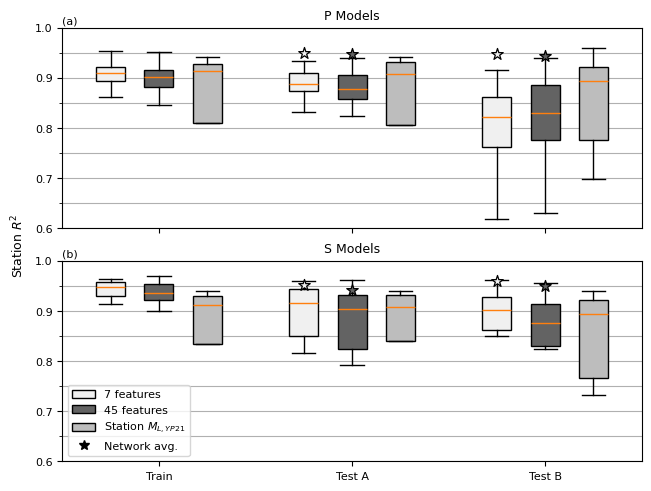

In [39]:
fig, axes = plt.subplots(2, 1, constrained_layout=True)

h_offset = 0.25
r2_marker = '*'
r2_markersize = 75
r2_marker_linewidth = 0.9
bp_colors = ['#f0f0f0', '#636363', '#bdbdbd']
cap_width = 0.12
main_x = np.array([0, 1, 2])
splits = ['Train', 'Test A', 'Test B']
ylim = [0.6, 1.0]

labels = ['7 features', '45 features', 'Station $M_{L,YP21}$', 'Network avg.']

test_r2 = [p_sub_test_avg_r2, p_all_test_avg_r2, None]
holdout_r2 = [p_sub_2023_avg_r2, p_all_2023_avg_r2, None]
ax = axes[0]
for i, df in enumerate([p_sub_results, p_all_results, ypml_p_r2_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    if test_r2[i] is not None:
        ax.scatter(main_x[1:2]+offset, test_r2[i],
                marker=r2_marker,
                color=color,
                zorder=10,
                s=r2_markersize,
                edgecolor='k',
                linewidth=r2_marker_linewidth)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    if holdout_r2[i] is not None:
        ax.scatter(main_x[-1:]+offset, holdout_r2[i],
                marker=r2_marker,
                color=color,
                zorder=10,
                s=r2_markersize,
                edgecolor='k',
                linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

ax.set_xticks(main_x+(h_offset), [])
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("P Models")
ax.set_xlim([-0.25, 2.75])


ax = axes[1]
test_r2 = [s_sub_test_avg_r2, s_all_test_avg_r2, None]
holdout_r2 = [s_sub_2023_avg_r2, s_all_2023_avg_r2, None]
legend_boxes = []
for i, df in enumerate([s_sub_results, s_all_results, ypml_s_r2_results]):
    offset = h_offset*i
    color=bp_colors[i]
    bp1 = ax.boxplot(df[['train_r2', 'test_r2']],
                vert=True,
                positions=main_x[:-1]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    if test_r2[i] is not None:            
        ax.scatter(main_x[1:2]+offset, test_r2[i],
                marker=r2_marker,
                color=color,
                zorder=10,
                s=r2_markersize, 
                edgecolor='k',
                linewidth=r2_marker_linewidth,)
    bp2 = ax.boxplot(df['holdout_r2'].dropna(),
                vert=True,
                positions=main_x[-1:]+offset,
                showfliers=False,
                patch_artist=True,
                capwidths=cap_width);
    if holdout_r2[i] is not None:            
        star = ax.scatter(main_x[-1:]+offset, holdout_r2[i],
                marker=r2_marker,
                color=color,
                zorder=10,
                s=r2_markersize,
                edgecolor='k',
                linewidth=r2_marker_linewidth)
    for bp in [bp1, bp2]:
        for patch in bp['boxes']:
            patch.set_facecolor(color)

    legend_boxes.append(bp1['boxes'][0])

ax.set_xticks(main_x+(h_offset), splits)
ax.set_ylim(ylim)
ax.set_xlim([-0.25, 2.75])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(axis='y', which='both')
ax.set_title("S Models")
fig.supylabel("Station $R^2$")

subpanel_labels = ["(a)", "(b)"]
for i, ax in enumerate(axes):
    ax.text(0, 1.02, subpanel_labels[i], 
    transform=ax.transAxes,)

# Set up legend
star = Line2D([0], [0], marker=r2_marker, 
              color='black', 
              markersize=r2_markersize//10, 
              linestyle='')
legend_boxes.append(star)
ax.legend(legend_boxes, labels, loc='lower left')


In [40]:
ypml_amps[ypml_amps.Evid.isin(s_2023_evids)].value_counts('Sta')

Sta
YMR     412
YHB     314
YNR     214
YUF     181
YFT     135
BOZ      51
AHID     26
LKWY     17
BW06     16
Name: count, dtype: int64

In [41]:
s_2023_df.value_counts('station')

station
YHB     225
YMR     172
YMC     171
YUF     118
YHH     113
YNR      99
YDD      82
YFT      55
YTP      49
YHL      39
YPP      35
FLWY     12
YML       7
YNM       6
LKWY      2
Name: count, dtype: int64

# Residual Plots

In [42]:
def get_residuals(df):
    return df['magnitude'] - df['predicted_magnitude']

In [43]:
p_sub_test_preds['residual'] = get_residuals(p_sub_test_preds)
p_sub_2023_preds['residual'] = get_residuals(p_sub_2023_preds)
s_sub_test_preds['residual'] = get_residuals(s_sub_test_preds)
s_sub_2023_preds['residual'] = get_residuals(s_sub_2023_preds)
p_sub_train_preds['residual'] = get_residuals(p_sub_train_preds)
s_sub_train_preds['residual'] = get_residuals(s_sub_train_preds)

In [44]:
ypml_amps.columns

Index(['Evid', 'Sta', 'Cmp', 'Net', 'ChanE', 'Loc', 'SMagTypeE', 'AmpE', 'UnE',
       'SMLE', 'SMLResE', 'Corr', 'SourceE', 'PerE', 'SnrE', 'EqLat', 'EqLon',
       'EqDepSL', 'EqOt', 'CatMag', 'CatMagType', 'Date', 'SLat', 'SLon',
       'SElev', 'ChanN', 'SMagTypeN', 'AmpN', 'UnN', 'SMLN', 'SMLResN',
       'SourceN', 'PerN', 'SnrN', 'EqDep', 'Repi', 'Rhyp', 'halfAmpH', 'Dmin',
       'LOGA', 'LOGA0-YP', 'LOGA0-UUSS', 'Sta-YP', 'Sj-YP', 'Sta-UUSS',
       'Sj-UUSS', 'Station-UUSSML', 'Station-UUSSML-S', 'Event-Mean-UUSSML',
       'Event-Median-UUSSML', 'Event-Mean-UUSSML-S', 'Event-Median-UUSSML-S',
       'Station-YPML', 'Station-YPML-S', 'Event-Mean-YPML',
       'Event-Median-YPML', 'Event-Mean-YPML-S', 'Event-Median-YPML-S',
       'MwPref', 'SLUMw', 'UUSSMw'],
      dtype='object')

In [45]:
def get_ypml_residuals(df, evids):
    tmp_df = df[df['Evid'].isin(evids)]
    return tmp_df['Event-Mean-YPML-S'] - tmp_df['Station-YPML-S']

In [46]:
p_sub_test_resids = get_residuals(p_sub_test_preds)
p_sub_2023_resids = get_residuals(p_sub_2023_preds)
p_all_test_resids = get_residuals(p_all_test_preds)
p_all_2023_resids = get_residuals(p_all_2023_preds)

s_sub_test_resids = get_residuals(s_sub_test_preds)
s_sub_2023_resids = get_residuals(s_sub_2023_preds)
s_all_test_resids = get_residuals(s_all_test_preds)
s_all_2023_resids = get_residuals(s_all_2023_preds)

In [47]:
ypml_p_test_resids = get_ypml_residuals(ypml_amps,
                                        p_test_evids)
ypml_s_test_resids = get_ypml_residuals(ypml_amps,
                                        s_test_evids)
ypml_p_2023_resids = get_ypml_residuals(ypml_amps,
                                        p_2023_evids)
ypml_s_2023_resids = get_ypml_residuals(ypml_amps,
                                        s_2023_evids)

In [48]:
p_sub_test_preds

,Evid,magnitude,predicted_magnitude,station,residual
0,60001357,2.096191,1.888076,YPP,0.208114
1,60001372,2.519942,2.066855,YPP,0.453087
2,60001382,3.094789,3.082749,YPP,0.012040
3,60002142,2.352687,2.092923,YPP,0.259765
4,60004552,2.102261,2.188987,YPP,-0.086726
...,...,...,...,...,...
154,60526957,2.395583,2.510796,YDD,-0.115213
155,60527847,2.014848,1.962328,YDD,0.052520
156,60323457,0.872489,1.053658,YDD,-0.181168
157,60347232,1.561523,1.628659,YDD,-0.067135


In [49]:
ypml_stats = ypml_amps.Sta.unique()

In [50]:
all_sub_p_preds = pd.concat([p_sub_test_preds, p_sub_2023_preds])
filt_all_sub_p_preds = all_sub_p_preds[all_sub_p_preds.station.isin(ypml_stats)]
filt_all_sub_p_resids = get_residuals(filt_all_sub_p_preds)

all_sub_s_preds = pd.concat([s_sub_test_preds, s_sub_2023_preds])
filt_all_sub_s_preds = all_sub_s_preds[all_sub_s_preds.station.isin(ypml_stats)]
filt_all_sub_s_resids = get_residuals(filt_all_sub_s_preds)


In [51]:
print(s_test_df.shape)
print(s_2023_df.shape)

(3327, 108)
(1185, 108)


In [52]:
filt_all_sub_s_preds.shape

(2426, 5)

In [53]:
print(ypml_s_2023_resids.shape)
print(ypml_s_test_resids.shape)

(1366,)
(4101,)


In [54]:
# network avg residuals
p_all_test_avg_resids = get_residuals(p_all_test_avg)
p_all_2023_avg_resids = get_residuals(p_all_2023_avg)
s_all_test_avg_resids = get_residuals(s_all_test_avg)
s_all_2023_avg_resids = get_residuals(s_all_2023_avg)

p_sub_test_avg_resids = get_residuals(p_sub_test_avg)
p_sub_2023_avg_resids = get_residuals(p_sub_2023_avg)
s_sub_test_avg_resids = get_residuals(s_sub_test_avg)
s_sub_2023_avg_resids = get_residuals(s_sub_2023_avg)

Text(0.5, 0.01, '$M_{L,YP21}$ Residual (mu)')

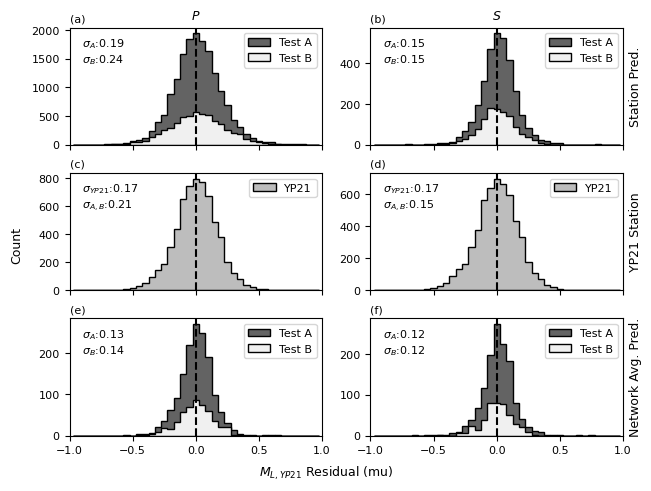

In [55]:
fig, axes = plt.subplots(3, 2, constrained_layout=True)

ypml_color = '#bdbdbd'
test_color = '#636363'
holdout_color = '#f0f0f0'
comb_color = '#636363'
comb_filt_color = 'k'
alpha=1.0
bins = np.concatenate([np.arange(-0.975, 0, 0.05), np.arange(0.025, 1.025, 0.05)]) 
#np.concatenate([np.arange(-1, 0, 0.05), np.arange(0, 1.05, 0.05)])
hist_kwargs = {'bins': bins,
               'edgecolor':'k',
               'histtype': 'stepfilled',
               'align':'mid'}

p_dict = {'test': p_sub_test_resids,
          '2023':p_sub_2023_resids,
          'test_avg': p_sub_test_avg_resids,
          '2023_avg': p_sub_2023_avg_resids,
          'ypml':np.concatenate([ypml_p_2023_resids, 
                                ypml_p_test_resids]),
          'combined':np.concatenate([p_sub_2023_resids,
                                        p_sub_test_resids]),
          'combined_filtered': filt_all_sub_p_resids
          }

s_dict = {'test': s_sub_test_resids,
          '2023':s_sub_2023_resids,
          'test_avg': s_sub_test_avg_resids,
          '2023_avg': s_sub_2023_avg_resids,
          'ypml':np.concatenate([ypml_s_2023_resids, 
                                ypml_s_test_resids]),
          'combined':np.concatenate([s_sub_2023_resids,
                                        s_sub_test_resids],),
          'combined_filtered': None  #filt_all_sub_s_resids
          }

def plot_hist(resids_dict, axind, col_title=None, ylabel=False):
    text_y = 0.7
    # 1
    axes[0][axind].set_title(col_title)
    axes[0][axind].hist(resids_dict['test'],
                    color=test_color,
                    label='Test A',
                    **hist_kwargs);
    axes[0][axind].hist(resids_dict['2023'],
                    color=holdout_color,
                    label='Test B',
                    alpha=alpha,
                    **hist_kwargs)
    stdtest = np.std(resids_dict['test'])
    std2023 = np.std(resids_dict['2023'])
    axes[0][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_B$:{std2023:0.2f}',
                         transform=axes[0][axind].transAxes,
                         color='k',)
    if ylabel:
        axes[0][axind].yaxis.set_label_position("right")
        axes[0][axind].set_ylabel("Station Pred.")
    axes[0][axind].set_xticklabels([])

    # 3
    axes[2][axind].hist(resids_dict['test_avg'],
                    color=test_color,
                    label='Test A',
                    **hist_kwargs)
    axes[2][axind].hist(resids_dict['2023_avg'],
                    color=holdout_color,
                    alpha=alpha,
                    label='Test B',
                    **hist_kwargs)
    stdtest = np.std(resids_dict['test_avg'])
    std2023 = np.std(resids_dict['2023_avg'])
    axes[2][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_B$:{std2023:0.2f}',
                         transform=axes[2][axind].transAxes,
                         color='k')
    if ylabel:
        axes[2][axind].yaxis.set_label_position("right")
        axes[2][axind].set_ylabel("Network Avg. Pred.")

    # 2
    # axes[2][axind].hist(resids_dict['combined'],
    #                 color=comb_color,
    #                 **hist_kwargs)
    stdpred = np.std(resids_dict['combined'])
    # stdpred_filt = None
    # if resids_dict['combined_filtered'] is not None:
    #     axes[2][axind].hist(resids_dict['combined_filtered'],
    #                 color=comb_filt_color,
    #                 **hist_kwargs)
    #     stdpred_filt = np.std(resids_dict['combined_filtered'])        
    #     text_y = 0.55

    axes[1][axind].hist(resids_dict['ypml'],
                                    color=ypml_color,
                                   #alpha=alpha,
                                   label='YP21',
                                   **hist_kwargs)
    stdypml = np.std(resids_dict['ypml'])

    # if stdpred_filt is None:
    #     axes[2][axind].text(0, 0.70,
    #                     f'$\sigma_{{A,B}}$:{stdpred:0.2f}\n$\sigma_{{YP21}}$:{stdypml:0.2f}',
    #                      transform=axes[2][axind].transAxes,
    #                      color='k')
    # else:
    #   axes[2][axind].text(0,text_y,
    #           f'$\sigma_{{A,B}}$:{stdpred:0.2f}\n$\sigma_{{A,B,filt}}$:{stdpred_filt:0.2f}\n$\sigma_{{YP21}}$:{stdypml:0.2f}',
    #             transform=axes[2][axind].transAxes,
    #             color='k')

    axes[1][axind].text(0.05, text_y,
                        f'$\sigma_{{YP21}}$:{stdypml:0.2f}\n$\sigma_{{A,B}}$:{stdpred:0.2f}',
                         transform=axes[1][axind].transAxes,
                         color='k')
    if ylabel:
        axes[1][axind].yaxis.set_label_position("right")
        axes[1][axind].set_ylabel("YP21 Station")
    axes[1][axind].set_xticklabels([])

plot_hist(p_dict, 0, "$\it{P}$")
plot_hist(s_dict, 1,  "$\it{S}$", True)

subpanel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes.flatten()):
    ax.set_xlim([-1, 1])
    ax.axvline(0, color='k', linestyle='--', zorder=2)
    ax.legend(loc='upper right')
    ax.text(0, 1.05, subpanel_labels[i], 
    transform=ax.transAxes,)

axes[0][1].legend()
axes[1][1].legend()
axes[2][1].legend()

fig.supylabel("Count")
fig.supxlabel('$M_{L,YP21}$ Residual (mu)') # (wrt $M_{L, YP21}$)')

Text(0.5, 0.01, '$M_{L,YP21}$ Residual (mu)')

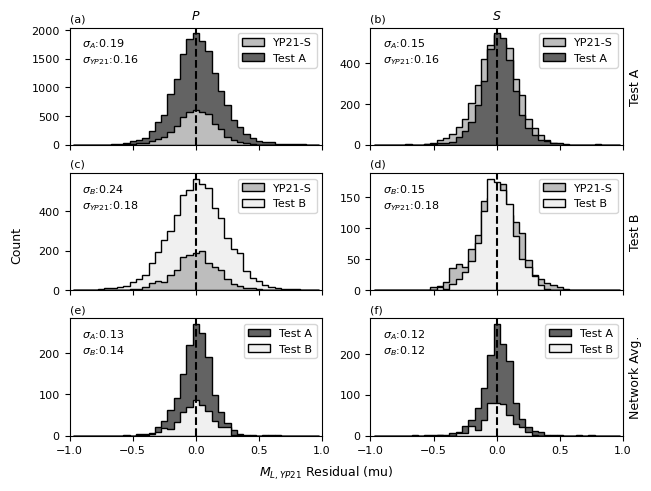

In [56]:
fig, axes = plt.subplots(3, 2, constrained_layout=True)

ypml_color = '#bdbdbd'
test_color = '#636363'
holdout_color = '#f0f0f0'
comb_color = '#636363'
comb_filt_color = 'k'
alpha=1.0
bins = np.concatenate([np.arange(-0.975, 0, 0.05), np.arange(0.025, 1.025, 0.05)]) 
#np.concatenate([np.arange(-1, 0, 0.05), np.arange(0, 1.05, 0.05)])
hist_kwargs = {'bins': bins,
               'edgecolor':'k',
               'histtype': 'stepfilled',
               'align':'mid'}

p_dict = {'test': p_sub_test_resids,
          '2023':p_sub_2023_resids,
          'test_avg': p_sub_test_avg_resids,
          '2023_avg': p_sub_2023_avg_resids,
          'ypml_2023':ypml_p_2023_resids, 
          'ypml_test': ypml_p_test_resids,
          }

s_dict = {'test': s_sub_test_resids,
          '2023':s_sub_2023_resids,
          'test_avg': s_sub_test_avg_resids,
          '2023_avg': s_sub_2023_avg_resids,
          'ypml_2023':ypml_s_2023_resids, 
          'ypml_test':ypml_s_test_resids ,
          }

def plot_hist(resids_dict, axind, col_title=None, ylabel=False, test_zorder=0):
    text_y = 0.7
    # 1
    axes[0][axind].set_title(col_title)
    axes[0][axind].hist(resids_dict['ypml_test'],
                color=ypml_color,
                label='YP21-S',
                alpha=alpha,
                **hist_kwargs)
    axes[0][axind].hist(resids_dict['test'],
                    color=test_color,
                    label='Test A',
                    zorder=test_zorder,
                    **hist_kwargs);
    stdtest = np.std(resids_dict['test'])
    std2023 = np.std(resids_dict['ypml_test'])
    axes[0][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_{{YP21}}$:{std2023:0.2f}',
                         transform=axes[0][axind].transAxes,
                         color='k',)
    if ylabel:
        axes[0][axind].yaxis.set_label_position("right")
        axes[0][axind].set_ylabel("Test A")
    axes[0][axind].set_xticklabels([])

    # 3
    axes[2][axind].hist(resids_dict['test_avg'],
                    color=test_color,
                    label='Test A',
                    **hist_kwargs)
    axes[2][axind].hist(resids_dict['2023_avg'],
                    color=holdout_color,
                    alpha=alpha,
                    label='Test B',
                    **hist_kwargs)
    stdtest = np.std(resids_dict['test_avg'])
    stdtest_ypml = np.std(resids_dict['2023_avg'])
    axes[2][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_B$:{stdtest_ypml:0.2f}',
                         transform=axes[2][axind].transAxes,
                         color='k')
    if ylabel:
        axes[2][axind].yaxis.set_label_position("right")
        axes[2][axind].set_ylabel("Network Avg.")

    # 2

    stdpred = np.std(resids_dict['2023'])
    axes[1][axind].hist(resids_dict['ypml_2023'],
                                    color=ypml_color,
                                   #alpha=alpha,
                                   label='YP21-S',
                                   **hist_kwargs)
    axes[1][axind].hist(resids_dict['2023'],
                    color=holdout_color,
                    label='Test B',
                    zorder=test_zorder,
                    **hist_kwargs);
    stdypml_2023 = np.std(resids_dict['ypml_2023'])
    axes[1][axind].text(0.05, text_y,
                        f'$\sigma_B$:{stdpred:0.2f}\n$\sigma_{{YP21}}$:{stdypml_2023:0.2f}',
                         transform=axes[1][axind].transAxes,
                         color='k')
    if ylabel:
        axes[1][axind].yaxis.set_label_position("right")
        axes[1][axind].set_ylabel("Test B")
    axes[1][axind].set_xticklabels([])

plot_hist(p_dict, 0, "$\it{P}$")
plot_hist(s_dict, 1,  "$\it{S}$", True, test_zorder=1)

subpanel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes.flatten()):
    ax.set_xlim([-1, 1])
    ax.axvline(0, color='k', linestyle='--', zorder=2)
    ax.legend(loc='upper right')
    ax.text(0, 1.05, subpanel_labels[i], 
    transform=ax.transAxes,)

# axes[0][1].legend(loc='upper right', fontsize=8)
# axes[1][1].legend(loc='upper right', fontsize=8)
# axes[2][1].legend(loc='upper right', fontsize=8)

fig.supylabel("Count")
fig.supxlabel('$M_{L,YP21}$ Residual (mu)') # (wrt $M_{L, YP21}$)')

In [57]:
np.std(p_all_2023_resids)

0.23484541430956385

In [58]:
np.std(p_all_test_resids)

0.19267433301063477

In [59]:
np.std(s_all_2023_resids)

0.1592941295549352

In [60]:
np.std(s_all_test_resids)

0.15552669868468866

# Remove YDC from p 2023 results

In [61]:
p_sub_2023_preds_noYDC = p_sub_2023_preds[p_sub_2023_preds.station != "YDC"]

In [62]:
p_sub_2023_resids_noYDC = get_residuals(p_sub_2023_preds_noYDC)

In [63]:
print(f'{np.std(p_sub_2023_resids_noYDC):0.2f}')

0.22


# Look for problematic events

In [64]:
p_sub_2023_preds_noYDC.iloc[np.where(p_sub_2023_resids_noYDC > 0.70)]

,Evid,magnitude,predicted_magnitude,station,residual
142,60535541,3.615056,2.508149,YMR,1.106907
208,60539831,2.380550,1.659538,YMC,0.721012
104,60535541,3.615056,2.881715,YUF,0.733340
56,60552132,2.846738,2.119000,YPK,0.727738
19,60535541,3.615056,2.875229,YPC,0.739827
33,60535541,3.615056,2.828471,YNE,0.786585


In [65]:
p_sub_2023_preds[p_sub_2023_preds.Evid == 60535541]

,Evid,magnitude,predicted_magnitude,station,residual
86,60535541,3.615056,2.958868,YPP,0.656188
118,60535541,3.615056,3.215493,YWB,0.399563
143,60535541,3.615056,2.960422,YPM,0.654634
134,60535541,3.615056,3.052619,YHB,0.562437
142,60535541,3.615056,2.508149,YMR,1.106907
92,60535541,3.615056,2.947518,YHH,0.667538
138,60535541,3.615056,3.072079,YHL,0.542977
143,60535541,3.615056,3.055933,YMC,0.559123
119,60535541,3.615056,3.092747,YGC,0.522309
104,60535541,3.615056,2.881715,YUF,0.733340


In [66]:
p_sub_2023_preds_noYDC.iloc[np.where(p_sub_2023_resids_noYDC < -0.70)]

,Evid,magnitude,predicted_magnitude,station,residual
26,60539536,1.607726,2.318571,YLA,-0.710844
9,60530587,1.372621,2.082178,YPK,-0.709557
44,60539536,1.607726,2.391829,YPK,-0.784102
36,60533336,0.469233,1.365017,YFT,-0.895784
38,60533386,0.760449,1.476351,YFT,-0.715901
40,60533426,0.731004,1.447950,YFT,-0.716945
41,60533441,0.764952,1.563043,YFT,-0.798091
54,60533601,0.672340,1.539928,YFT,-0.867588
56,60533621,0.813680,1.523279,YFT,-0.709599
58,60533651,0.540716,1.424314,YFT,-0.883598


In [67]:
print(r2_score(p_sub_2023_preds[p_sub_2023_preds.station == 'YNM']['magnitude'],
         p_sub_2023_preds[p_sub_2023_preds.station == 'YNM']['predicted_magnitude']))
get_residuals(p_sub_2023_preds[p_sub_2023_preds.station == 'YNM'])

0.6887621059316424


0   -0.098086
1    0.124251
2   -0.032686
3    0.030301
4   -0.057159
5   -0.181802
6    0.166219
7    0.058439
dtype: float64

In [68]:
print(r2_score(p_sub_2023_preds[p_sub_2023_preds.station == 'YPK']['magnitude'],
         p_sub_2023_preds[p_sub_2023_preds.station == 'YPK']['predicted_magnitude']))
get_residuals(p_sub_2023_preds[p_sub_2023_preds.station == 'YPK']).max()

0.6184238896011937


0.7277379501470431

In [69]:
np.std(get_residuals(p_sub_2023_preds_noYDC[p_sub_2023_preds_noYDC.Evid != 60535541]))

0.22158584934021924

In [70]:
np.std(get_residuals(p_sub_2023_preds_noYDC[p_sub_2023_preds_noYDC.Evid != 60541436]))

0.2234202301195843

In [71]:
p_2023_df['Event-Mean-YPML-S'].max()

3.6150559021178994

In [72]:
p_2023_df

,event_identifier,arrival_identifier,network,station,channel,location_code,source_latitude,source_longitude,source_receiver_distance_km,source_receiver_back_azimuth,...,avg_noise_15.00,avg_signal_15.00,avg_noise_16.00,avg_signal_16.00,avg_noise_17.00,avg_signal_17.00,avg_noise_18.00,avg_signal_18.00,Evid,Event-Mean-YPML-S
0,60528982,10811452,WY,YHH,EHZ,1,44.811000,-110.957167,8.807573,286.658262,...,0.000306,0.050727,0.000264,0.040085,0.000224,0.031680,0.000190,0.025124,60528982.0,1.363650
1,60528982,10811455,WY,YPM,EHZ,1,44.811000,-110.957167,18.476032,337.734355,...,0.000256,0.021688,0.000217,0.016762,0.000187,0.013034,0.000164,0.010219,60528982.0,1.363650
2,60528982,10811460,WY,MCID,EHZ,1,44.811000,-110.957167,71.263327,14.496014,...,0.000238,0.005577,0.000192,0.004395,0.000156,0.003463,0.000126,0.002737,60528982.0,1.363650
3,60528982,10811450,WY,YMC,EHZ,1,44.811000,-110.957167,6.928504,34.012725,...,0.000229,0.559901,0.000179,0.456169,0.000145,0.369211,0.000120,0.298210,60528982.0,1.363650
4,60528982,10811453,WY,YMR,HHZ,1,44.811000,-110.957167,15.828826,2.243559,...,0.000212,0.292705,0.000189,0.279041,0.000174,0.256741,0.000160,0.230260,60528982.0,1.363650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,60554952,10850400,WY,YJC,HHZ,1,44.648833,-110.440833,13.902514,211.535441,...,0.000173,0.017581,0.000147,0.015941,0.000129,0.014312,0.000116,0.012790,60554952.0,0.710402
5857,60554952,10850401,WY,YML,EHZ,1,44.648833,-110.440833,16.768706,73.173230,...,0.000323,0.028620,0.000318,0.022773,0.000320,0.018065,0.000315,0.014353,60554952.0,0.710402
5858,60554952,10850402,WY,YNR,HHZ,1,44.648833,-110.440833,20.296083,111.324670,...,0.001369,0.025976,0.001239,0.025523,0.001088,0.023972,0.000935,0.021844,60554952.0,0.710402
5859,60554952,10850404,WY,YDD,HHZ,1,44.648833,-110.440833,30.179391,20.843363,...,0.000528,0.003034,0.000509,0.002749,0.000481,0.002458,0.000444,0.002173,60554952.0,0.710402


In [73]:
s_sub_train_preds[abs(s_sub_train_preds['magnitude'] - s_sub_train_preds['predicted_magnitude']) > 0.7]

,Evid,magnitude,predicted_magnitude,station,residual
295,60054062,1.174340,0.460954,YHB,0.713386
508,60081822,1.394383,0.454705,YHB,0.939678
1114,60515582,3.984394,3.274122,YHB,0.710272
144,60437617,2.506629,1.693193,FLWY,0.813435
208,60446562,2.162197,1.453058,FLWY,0.709140
3,60006802,0.973206,2.419973,YNR,-1.446767
126,60049467,1.398577,0.503299,YNR,0.895278
562,60203137,4.326333,3.562493,YNR,0.763840
96,60203137,4.326333,3.200971,YHL,1.125361
644,60203137,4.326333,3.181538,YMR,1.144795


# Residuals as a function of magnitude

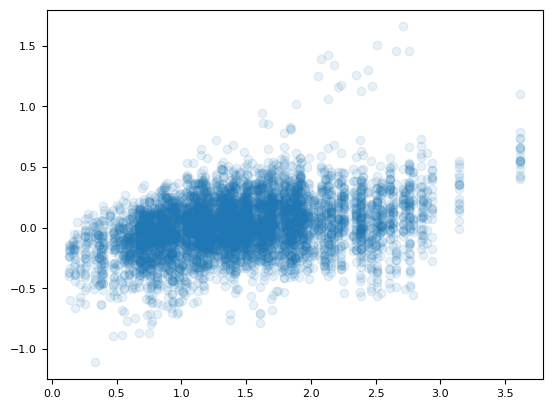

In [74]:
plt.scatter(p_sub_2023_preds['magnitude'], 
            p_sub_2023_preds['magnitude']-p_sub_2023_preds['predicted_magnitude'],
            alpha=0.1)

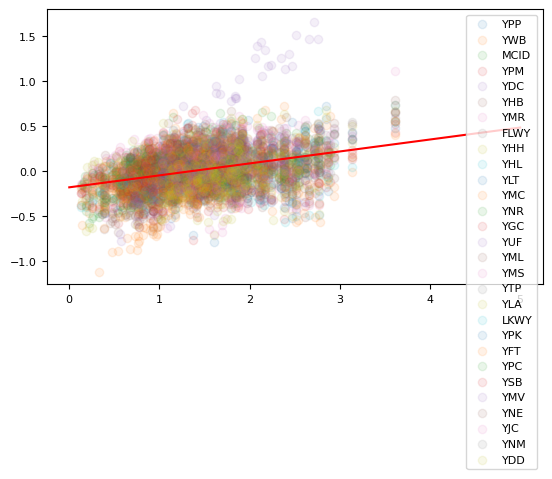

In [75]:
fig, ax = plt.subplots()
for stat in p_sub_2023_preds.station.unique():
    sdf = p_sub_2023_preds[p_sub_2023_preds.station == stat]
    X = sdf['magnitude']
    y = sdf['magnitude']-sdf['predicted_magnitude']
    ax.scatter(X, 
               y,
               alpha=0.1,
               label=stat)
X = p_sub_2023_preds['magnitude']
y = p_sub_2023_preds['magnitude']-p_sub_2023_preds['predicted_magnitude']
m ,b  = np.polyfit(X, y, deg=1)
ax.plot(np.arange(0, 5.5), m*np.arange(0, 5.5)+b, color='r')
ax.set_aspect('equal', adjustable='box')
ax.legend()

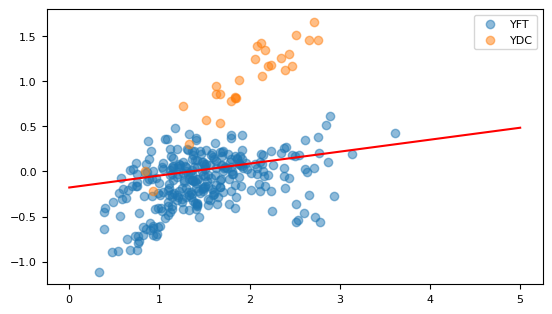

In [76]:
fig, ax = plt.subplots()
for stat in ['YFT', 'YDC']: #p_sub_2023_preds.station.unique():
    sdf = p_sub_2023_preds[p_sub_2023_preds.station == stat]
    X = sdf['magnitude']
    y = sdf['magnitude']-sdf['predicted_magnitude']
    ax.scatter(X, 
               y,
               alpha=0.5,
               label=stat)
X = p_sub_2023_preds['magnitude']
y = p_sub_2023_preds['magnitude']-p_sub_2023_preds['predicted_magnitude']
m ,b  = np.polyfit(X, y, deg=1)
ax.plot(np.arange(0, 5.5), m*np.arange(0, 5.5)+b, color='r')
ax.set_aspect('equal', adjustable='box')
ax.legend()

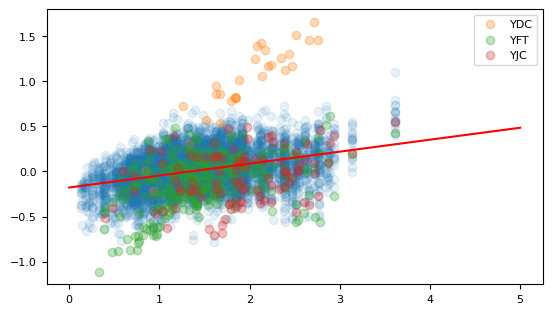

In [77]:
fig, ax = plt.subplots()
prob_stats = ['YDC', 'YFT', 'YJC']

sdf = p_sub_2023_preds[~p_sub_2023_preds.station.isin(prob_stats)]
X = sdf['magnitude']
y = sdf['magnitude']-sdf['predicted_magnitude']
ax.scatter(X, 
            y,
            alpha=0.1)

for stat in prob_stats:
    sdf = p_sub_2023_preds[p_sub_2023_preds.station == stat]
    X = sdf['magnitude']
    y = sdf['magnitude']-sdf['predicted_magnitude']
    ax.scatter(X, 
               y,
               alpha=0.3,
               label=stat)
    
X = p_sub_2023_preds['magnitude']
y = p_sub_2023_preds['magnitude']-p_sub_2023_preds['predicted_magnitude']
m ,b  = np.polyfit(X, y, deg=1)
ax.plot(np.arange(0, 5.5), m*np.arange(0, 5.5)+b, color='r')
ax.set_aspect('equal', adjustable='box')
ax.legend()

Text(0.02, 0.5, 'Residual')

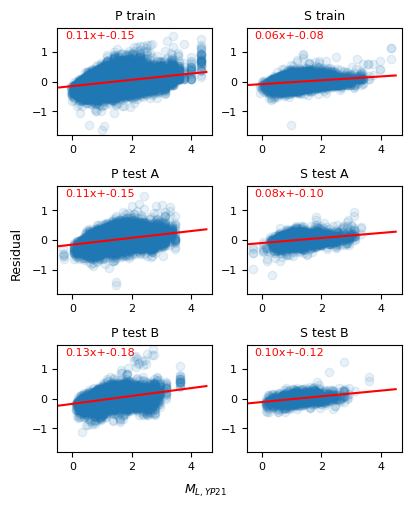

In [78]:
fig, axes = plt.subplots(3, 2, constrained_layout=True, figsize=(4, 5))
titles = ['P train', 'S train', 'P test A', 'S test A', 'P test B', 'S test B']
axes = axes.flatten()
for i, ds in enumerate([p_sub_train_preds, s_sub_train_preds, p_sub_test_preds, s_sub_test_preds, p_sub_2023_preds, s_sub_2023_preds]):
    ax = axes[i]
    X = ds['magnitude']
    y = ds['magnitude']-ds['predicted_magnitude']
    ax.scatter(X, y, alpha=0.1)
    m ,b  = np.polyfit(X, y, deg=1)
    ax.plot(np.arange(-0.5, 5.5), m*np.arange(-0.5, 5.5)+b, color='r')
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylim([-1.8, 1.8])
    ax.set_xlim([-0.5, 4.7])
    ax.set_title(titles[i])
    ax.text(0.05, 0.9, f'{m:0.2f}x+{b:0.2f}',
            color='r',
            transform=ax.transAxes)
    
fig.supxlabel("$M_{L,YP21}$")
fig.supylabel("Residual")

0 0.5
0.5 1.0
1.0 1.5
1.5 2.0
2.0 2.5
2.5 3.0
3.0 3.5
3.5 4.0


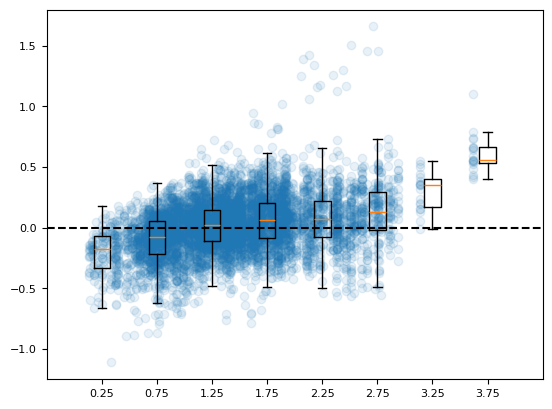

In [79]:
X = p_sub_2023_preds['magnitude']
y = p_sub_2023_preds['magnitude']-p_sub_2023_preds['predicted_magnitude']
plt.scatter(X, 
            y,
            alpha=0.1)

plt.axhline(0, color='k', linestyle='--')

mag_low = 0
for mag_upp in np.arange(0.5, 4.5, 0.5):
    print(mag_low, mag_upp)
    plt.boxplot(y[(X > mag_low )& (X <= mag_upp)].values, positions=[mag_upp-0.25], showfliers=False)
    mag_low = mag_upp


4.332082058224121
4.326332574321018
3.4466311934806155
3.3441340178495875
3.6150559021178994
3.6150559021178994


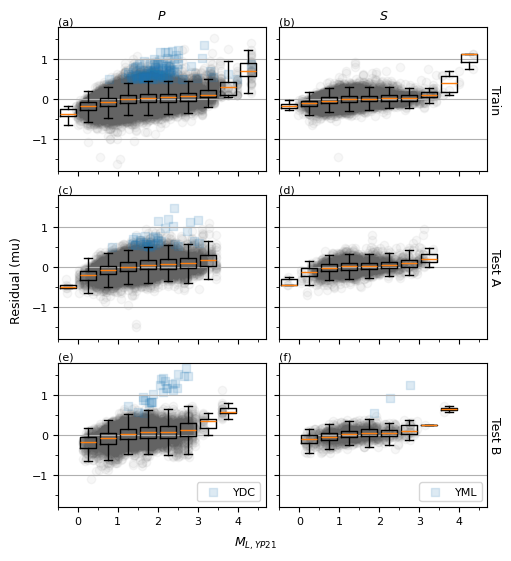

In [81]:
fig, axes = plt.subplots(3, 2, constrained_layout=True, figsize=(5, 5.5))
ylabels = ['Train', 'Test A', 'Test B']
titles = ['$\it{P}$', '$\it{S}$']
axes = axes.flatten()
for i, ds in enumerate([p_sub_train_preds, s_sub_train_preds, p_sub_test_preds, s_sub_test_preds, p_sub_2023_preds, s_sub_2023_preds]):
    ax = axes[i]
    if i%2==0:
        ax.scatter(ds[ds['station'] != 'YDC']['magnitude'], ds[ds['station'] != 'YDC']['residual'], alpha=0.05, color='#636363')    
        ds_ydc = ds[(ds['station'] == 'YDC') & (ds['residual'] > 0.5)]
        ax.scatter(ds_ydc['magnitude'], ds_ydc['residual'], alpha=0.15, color='C0', marker='s', label='YDC')    
    else:
        stat = 'YML'
        ax.scatter(ds[ds['station'] != stat]['magnitude'], ds[ds['station'] != stat]['residual'], alpha=0.05, color='#636363')    
        ds_yml = ds[(ds['station'] == stat) & (ds['residual'] > 0.5)]
        ax.scatter(ds_yml['magnitude'], ds_yml['residual'], alpha=0.15, color='C0', marker='s', label=stat)  

    # m ,b  = np.polyfit(X, y, deg=1)
    # ax.plot(np.arange(-0.5, 5.5), m*np.arange(-0.5, 5.5)+b, color='r')

    #ax.axhline(0, color='#bdbdbd', linestyle='--', linewidth=1)

    mag_low = -0.5
    for mag_upp in np.arange(0, 5.0, 0.5):
        ax.boxplot(ds[(ds['magnitude'] > mag_low )& (ds['magnitude']  <= mag_upp)]['residual'].values, 
                    positions=[mag_upp-0.25],
                    showfliers=False,
                    widths=0.4,
                    zorder=2)
        mag_low = mag_upp
    print(ds['magnitude'].max())
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylim([-1.8, 1.8])
    ax.set_xlim([-0.5, 4.7])

    ax.set_xticks(np.arange(0, 5), np.arange(0, 5)) 

    if i < 4:
        ax.set_xticklabels([])
    else:
        ax.legend(loc='lower right')

    if i < 2:
        ax.set_title(titles[i])

    if i%2 == 1:
        ax.set_yticklabels([])
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(ylabels[i//2], rotation=-90, labelpad=10.0)

    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))

    ax.grid(axis='y')
fig.supxlabel("$M_{L,YP21}$")
fig.supylabel("Residual (mu)")

subpanel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
for i, ax in enumerate(axes):
    ax.text(0, 1.02, subpanel_labels[i], 
    transform=ax.transAxes,)